Gunakan data scanner_data.csv untuk RFM Analysis!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn .preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Mendefinisikan data path
path = '/content/drive/My Drive/SMT_6/GCollab DS-1/Dataset - RFM/'

In [ ]:
#Loading the dataset
df = pd.read_csv(path + "scanner_data.csv")
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.0+ MB


Apakah terdapat missing value dalam data?

In [ ]:
df.isnull().sum()

Unnamed: 0        0
Date              0
Customer_ID       0
Transaction_ID    0
SKU_Category      0
SKU               0
Quantity          0
Sales_Amount      0
dtype: int64

Tidak ada missing value yg terdeteksi

Apakah ada data yang minus? Gunakan data yang bernilai positif untuk analysis ya!

In [ ]:
df.describe()

,Unnamed: 0,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000
mean,65853.500000,12386.450367,32389.604187,1.485311,11.981524
std,38020.391614,6086.447552,18709.901238,3.872667,19.359699
min,1.000000,1.000000,1.000000,0.010000,0.020000
25%,32927.250000,7349.000000,16134.000000,1.000000,4.230000
50%,65853.500000,13496.000000,32620.000000,1.000000,6.920000
75%,98779.750000,17306.000000,48548.000000,1.000000,12.330000
max,131706.000000,22625.000000,64682.000000,400.000000,707.730000


Hilangkan kolom No!

In [ ]:
df1 = df.drop('Unnamed: 0', axis=1)

In [ ]:
df1.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


Lakukan eksplor data experiment mengenai jumlah transaksi, banyaknya produk dan jumlah customer yang ada!

In [ ]:
#Melihat jumlah produk, jumlah transaksi, dan pelanggan
cust_x_prod = pd.DataFrame([{'products':len(df1['SKU'].value_counts()),
'transactions': len(df1['Transaction_ID'].value_counts()),
'customers': len(df1['Customer_ID'].value_counts()),}], 
columns = ['products', 'transactions', 'customers'], index = ['quantity'])
print(cust_x_prod)

          products  transactions  customers
quantity      5242         64682      22625


Apakah kolom data sudah memiliki tipe data yang sesuai? Jika belum, ubahlah dulu tipe datanya agar sesuai.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            131706 non-null  object 
 1   Customer_ID     131706 non-null  int64  
 2   Transaction_ID  131706 non-null  int64  
 3   SKU_Category    131706 non-null  object 
 4   SKU             131706 non-null  object 
 5   Quantity        131706 non-null  float64
 6   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 7.0+ MB


In [ ]:
df1['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
df1.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,2016-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2016-01-02,822,2,2ML,68BRQ,1.0,5.46
2,2016-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,2016-01-02,3719,4,0H2,549KK,1.0,5.59
4,2016-01-02,9200,5,0H2,K8EHH,1.0,6.88


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            131706 non-null  datetime64[ns]
 1   Customer_ID     131706 non-null  int64         
 2   Transaction_ID  131706 non-null  int64         
 3   SKU_Category    131706 non-null  object        
 4   SKU             131706 non-null  object        
 5   Quantity        131706 non-null  float64       
 6   Sales_Amount    131706 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 7.0+ MB


Kapan terakhir ada transaksi?

In [ ]:
#tanggal maksimum data
df1['Date'].max()

Timestamp('2016-12-31 00:00:00')

In [ ]:
df1.tail()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
131701,2016-07-04,20203,32900,IEV,FO112,3.0,6.46
131702,2016-07-04,20203,32900,N8U,I36F2,1.0,4.50
131703,2016-07-04,20203,32900,U5F,4X8P4,1.0,5.19
131704,2016-07-04,20203,32900,0H2,ZVTO4,1.0,4.57
131705,2016-07-04,20203,32900,Q4N,QM9BP,1.0,13.68


In [ ]:
#transaksi terakhir customer
import datetime as dt
now = dt.date(2016,12,31)

In [ ]:
df1.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,2016-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2016-01-02,822,2,2ML,68BRQ,1.0,5.46
2,2016-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,2016-01-02,3719,4,0H2,549KK,1.0,5.59
4,2016-01-02,9200,5,0H2,K8EHH,1.0,6.88


Lakukan RFM Analysis!
Bagaimana recency pelanggan?

In [ ]:
#Group by berdasarkan customer terakhir membeli

recency_df = df1.groupby(['Customer_ID'],as_index=False)['Date'].max()
recency_df.columns = ['Customer_ID','LastPurchaseDate']
recency_df.head()

,Customer_ID,LastPurchaseDate
0,1,2016-01-22
1,2,2016-06-19
2,3,2016-01-02
3,4,2016-11-09
4,5,2016-07-05


Diketahui bahwa pelanggan dengan Customer_ID 1 terakhir melakukan transaksi pada 22 Januari 2016

In [ ]:
#hitung seberapa sering dia membeli dengan mengacu pada tanggal terbaru dalam beberapa hari

recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)
recency_df.head()

,Customer_ID,LastPurchaseDate,Recency
0,1,2016-01-22,344
1,2,2016-06-19,195
2,3,2016-01-02,364
3,4,2016-11-09,52
4,5,2016-07-05,179


Pelanggan dengan Customer_ID 1 berarti sudah tidak melakukan transaksi selama 344 hari

Bagaimana frequency pelanggan?

In [ ]:
#periksa frekuensi pelanggan berarti sudah berapa kali transaksi

frequency_df = df1.copy()
frequency_df.drop_duplicates(subset=['Customer_ID','Transaction_ID'], keep="first", inplace=True) 
frequency_df = frequency_df.groupby('Customer_ID',as_index=False)['Transaction_ID'].count()
frequency_df.columns = ['Customer_ID','Frequency']
frequency_df.head()

,Customer_ID,Frequency
0,1,1
1,2,2
2,3,1
3,4,2
4,5,5


Pelanggan yang memiliki pembelian tertinggi (hight-frequency) yaitu Customer_ID 5

Bagaimana monetary pelanggan?

In [ ]:
df1['Total_cost'] = df1['Sales_Amount'] * df1['Quantity']

In [ ]:
monetary_df=df1.groupby('Customer_ID',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['Customer_ID','Monetary']
monetary_df.head()

,Customer_ID,Monetary
0,1,16.29
1,2,22.77
2,3,19.08
3,4,33.29
4,5,248.27


Hight-Monetary diketahui yaitu dengan Customer_ID 5

Gabungkan recency, frequency dan monetary pelanggan dalam satu tabel!

In [ ]:
#combine first recency and frequency
rf = recency_df.merge(frequency_df,left_on='Customer_ID',right_on='Customer_ID')

#combibe rf frame with monetary values
rfm = rf.merge(monetary_df,left_on='Customer_ID',right_on='Customer_ID')
rfm.set_index('Customer_ID',inplace=True)
rfm.head()

,LastPurchaseDate,Recency,Frequency,Monetary
Customer_ID,,,,
1,2016-01-22,344,1,16.29
2,2016-06-19,195,2,22.77
3,2016-01-02,364,1,19.08
4,2016-11-09,52,2,33.29
5,2016-07-05,179,5,248.27


In [ ]:
rfm.drop(columns=['LastPurchaseDate'],inplace=True)
rfm.head()

,Recency,Frequency,Monetary
Customer_ID,,,
1,344,1,16.29
2,195,2,22.77
3,364,1,19.08
4,52,2,33.29
5,179,5,248.27


Buatlah pengunaan klasifikasi quartile untuk menentukan limit dari setiap klasifikasinya!

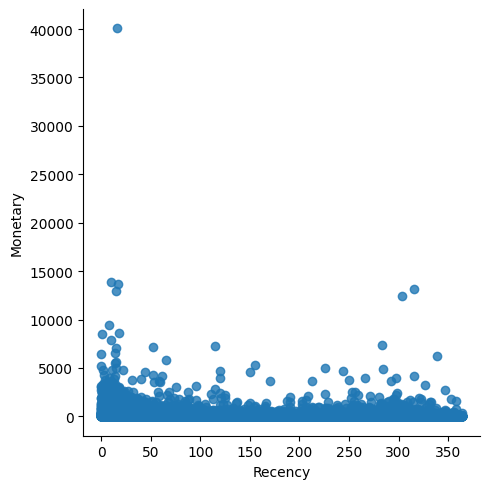

In [ ]:
# Monetary vs Recency for each segment
sns.lmplot(x='Recency', y='Monetary', data=rfm,fit_reg=True)

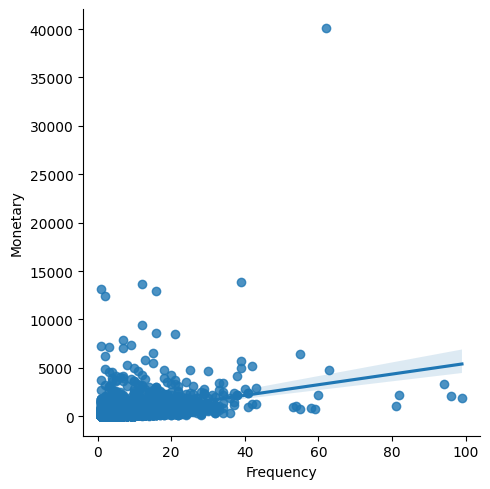

In [ ]:
sns.lmplot(x='Frequency', y='Monetary', data=rfm,fit_reg=True)

In [ ]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,47.0,1.0,10.81
0.50,149.0,1.0,27.26
0.75,271.0,3.0,83.08


In [ ]:
RFMScores= rfm.copy()
#Recency Scoring
def Rscoring(x,p,d):
   if x <= d[p][0.25]:
      return 1
   elif x <= d[p][0.50]:
      return 2
   elif x <= d[p][0.75]:
      return 3
   else:
      return 4
#Frequency and Monetary Scoring
def FMscoring (x,p,d):
   if x <= d[p][0.25]:
      return 4
   elif x <= d[p][0.50]:
      return 3
   elif x <= d[p][0.75]:
      return 2
   else:
      return 1
RFMScores['R']=RFMScores['Recency'].apply(Rscoring, args=('Recency',quantiles))
RFMScores['F']=RFMScores['Frequency'].apply(FMscoring, args=('Frequency',quantiles))
RFMScores['M']=RFMScores['Monetary'].apply(FMscoring, args=('Monetary',quantiles))
RFMScores['RFMgroup']=RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)
RFMScores['Score']=RFMScores[['R','F','M']].sum(axis=1)
print(RFMScores.head())

             Recency  Frequency  Monetary  R  F  M RFMgroup  Score
Customer_ID                                                       
1                344          1     16.29  4  4  3      443     11
2                195          2     22.77  3  2  3      323      8
3                364          1     19.08  4  4  3      443     11
4                 52          2     33.29  2  2  2      222      6
5                179          5    248.27  3  1  1      311      5


Lakukan Clustering K-means!

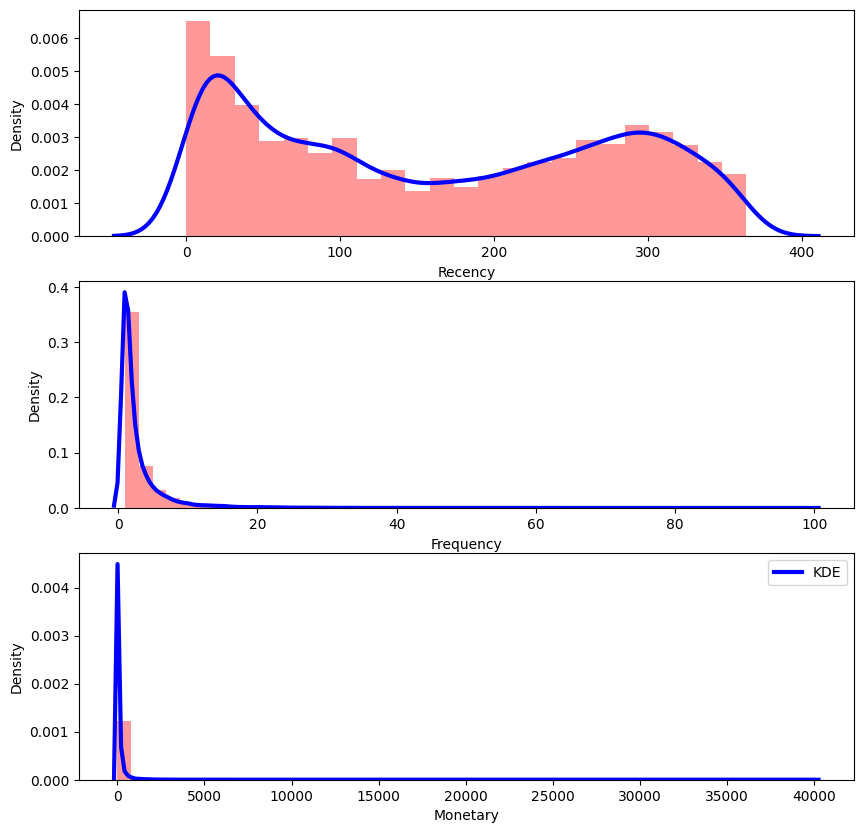

In [ ]:
#Melihat distibusi data hasil RFMScore
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.distplot(rfm['Recency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,2)
sns.distplot(rfm['Frequency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,3)
sns.distplot(rfm['Monetary'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.legend()
plt.show()

Persebaran data yang memiliki gap nilai jauh maka dilakukan scalling dengan metode MinMaxScaler

In [ ]:
clustering_rfm = rfm[['Recency',"Frequency","Monetary"]].copy()
clustering_rfm.head()

,Recency,Frequency,Monetary
Customer_ID,,,
1,344,1,16.29
2,195,2,22.77
3,364,1,19.08
4,52,2,33.29
5,179,5,248.27


In [ ]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(clustering_rfm)
data_scaled = pd.DataFrame(x_scaled,columns=['Recency','Frequency','Monetary'])
data_scaled

,Recency,Frequency,Monetary
0,0.945055,0.000000,0.000403
1,0.535714,0.010204,0.000565
2,1.000000,0.000000,0.000473
3,0.142857,0.010204,0.000827
4,0.491758,0.040816,0.006192
...,...,...,...
22620,0.057692,0.000000,0.000426
22621,0.041209,0.000000,0.000148
22622,0.027473,0.000000,0.005633
22623,0.079670,0.000000,0.000486


Gunakan ELbow methode untuk menentukan jumlah cluster.

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

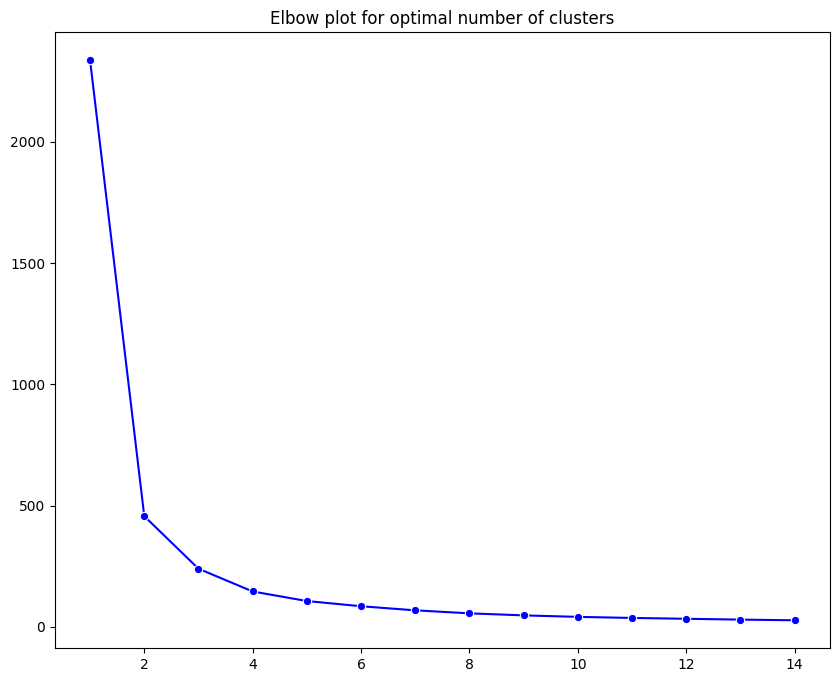

In [ ]:
wscc = []
for i in range(1,15): 
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data_scaled)
    wscc.append(kmeans.inertia_)  

plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,15),y=wscc,marker="o",c='blue')
plt.title("Elbow plot for optimal number of clusters")

In [ ]:
wscc

[2335.5869843860305,
 456.3712334765527,
 239.92146504691797,
 146.07010376759354,
 106.67829969858263,
 85.1635423990347,
 68.28574934428914,
 55.95644778959912,
 47.500202343889455,
 41.402521110077245,
 36.978404042939516,
 33.49320572708261,
 30.038166301538503,
 27.349360661000617]

Berapa cluster yang akan dibentuk dari Elbow methode? buatlah clusternya!

In [ ]:
#Clustering dengan mengunakan Kmeans.
kmeans = KMeans(n_clusters=3, random_state=0,init='k-means++',
                n_init =10,max_iter = 300).fit(data_scaled)
pred = kmeans.predict(data_scaled)
RFMScores['Cluster']=kmeans.labels_
RFMScores.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMgroup,Score,Cluster
Customer_ID,,,,,,,,,
1,344,1,16.29,4,4,3,443,11,1
2,195,2,22.77,3,2,3,323,8,2
3,364,1,19.08,4,4,3,443,11,1
4,52,2,33.29,2,2,2,222,6,0
5,179,5,248.27,3,1,1,311,5,2
6,275,1,25.55,4,4,3,443,11,1
7,87,1,17.84,2,4,3,243,9,0
8,193,1,19.56,3,4,3,343,10,2
9,286,1,15.75,4,4,3,443,11,1


In [ ]:
RFMScores.groupby('Cluster').mean().sort_values('Score',ascending=False)

,Recency,Frequency,Monetary,R,F,M,Score
Cluster,,,,,,,
1,297.905355,1.861144,77.995843,3.732659,3.145598,2.721250,9.599507
2,175.950231,1.942130,72.319094,2.692708,3.065008,2.676698,8.434414
0,44.711246,4.138466,183.390746,1.413343,2.402035,2.230983,6.046361


Bagaimana hasil pengelompokan pelanggan dari analisis yang telah dilakukan?

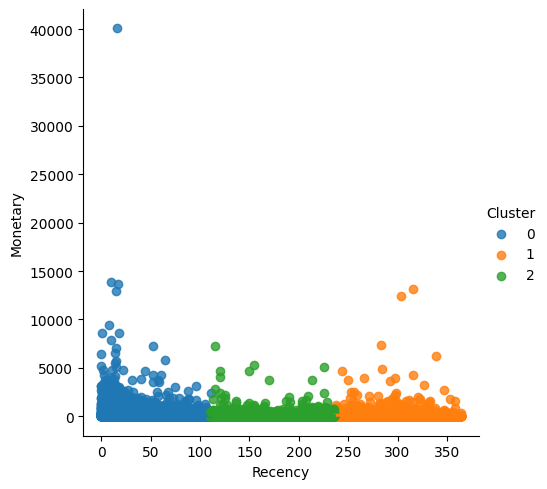

In [ ]:
sns.lmplot(x='Recency', y='Monetary', data=RFMScores, hue='Cluster', fit_reg=True)

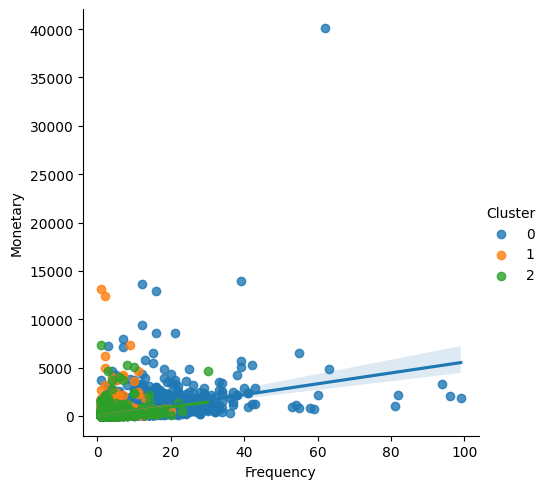

In [ ]:
sns.lmplot(x='Frequency', y='Monetary', data=RFMScores, hue='Cluster')

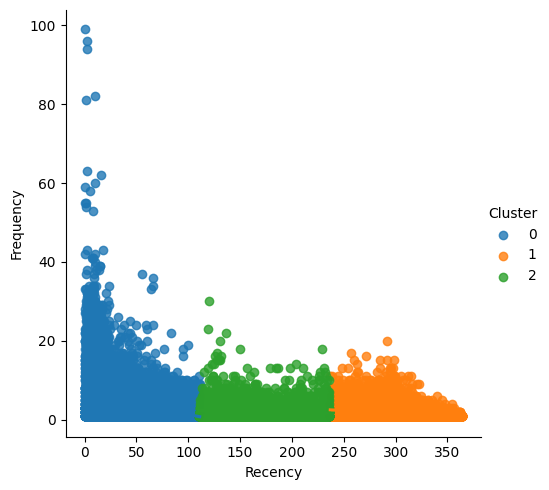

In [ ]:
sns.lmplot(x='Recency', y='Frequency', data=RFMScores, hue='Cluster', fit_reg=True)

Kesimpulan : diperoleh 3 cluster (0, 1, 2)
*  Cluster 0 memiliki recency rendah, frequency tinggi, monetary tinggi. Artinya pelanggan segment ini sering melakukan transaksi tiap transaksinya langsung mengeluarkan banyak uang 
*   Cluster 1 memiliki recency tertinggi, frequency rendah, monetary rendah. Artinya pelanggan segment ini lama tidak melakukan transaksi sehingga uang yang dikeluarkan sedikit


*   Cluster 2 memiliki recency frequency dan monetary tingkat menangah antara cluster 0 dan 1.  Artinya pelanggan segment ini tidak jarang dan tidak sering pula melakukan transaksi dengan uang yang dikeluarkan tidak banyak dan tidak sedikit pula.

Dapat dikategorikan bahwa Cluster 0 = pelanggan platinum, Cluster 1 = pelanggan silver, Cluster 2 = pelanggan gold 

